In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

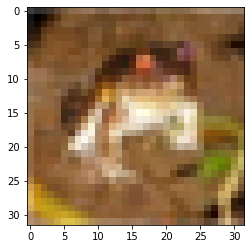

In [7]:
plt.imshow(X_train[0])

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

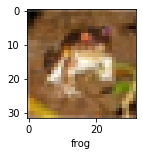

In [27]:
plot_sample(X_train,y_train,0)

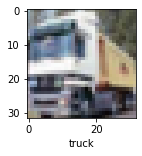

In [29]:
plot_sample(X_train,y_train,1)

In [30]:
X_train=X_train/255
X_test=X_test/255

In [32]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(4096,activation="relu"),
    layers.Dense(4096,activation="relu"),
    layers.Dense(10,activation="softmax")

])
model.compile(optimizer="SGD",
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 560s 329ms/step - loss: 1.7996 - accuracy: 0.3629
Epoch 2/10
1563/1563 [==============================] - 402s 257ms/step - loss: 1.6108 - accuracy: 0.4324
Epoch 3/10
1563/1563 [==============================] - 407s 260ms/step - loss: 1.5306 - accuracy: 0.4628
Epoch 4/10
1563/1563 [==============================] - 403s 258ms/step - loss: 1.4675 - accuracy: 0.4824
Epoch 5/10
1563/1563 [==============================] - 400s 256ms/step - loss: 1.4150 - accuracy: 0.5024
Epoch 6/10
1563/1563 [==============================] - 401s 256ms/step - loss: 1.3743 - accuracy: 0.5191
Epoch 7/10
1563/1563 [==============================] - 403s 258ms/step - loss: 1.3334 - accuracy: 0.5339
Epoch 8/10
1563/1563 [==============================] - 402s 257ms/step - loss: 1.2976 - accuracy: 0.5440
Epoch 9/10
1563/1563 [==============================] - 403s 258ms/step - loss: 1.2645 - accuracy: 0.5547
Epoch 10/10
1563/1563 [=======================

In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 21s 57ms/step - loss: 1.3526 - accuracy: 0.5168


[1.3525959253311157, 0.5167999863624573]

In [44]:
y_pred=model.predict(X_test)
y_pred_classes=[np.argmax(x) for x in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.55      0.58      1000
           1       0.69      0.58      0.63      1000
           2       0.48      0.28      0.35      1000
           3       0.43      0.26      0.33      1000
           4       0.38      0.54      0.45      1000
           5       0.49      0.31      0.38      1000
           6       0.61      0.52      0.56      1000
           7       0.45      0.74      0.56      1000
           8       0.56      0.73      0.64      1000
           9       0.53      0.64      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000



Text(69.0, 0.5, 'Truth')

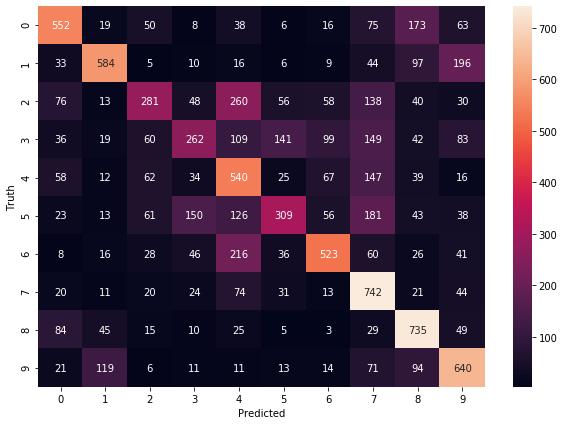

In [68]:
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [47]:
model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")

])
model.compile(optimizer="SGD",
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 139s 64ms/step - loss: 1.9962 - accuracy: 0.2772
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6016 - accuracy: 0.4292
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4300 - accuracy: 0.4907
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.3208 - accuracy: 0.5320
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.2352 - accuracy: 0.5634
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1566 - accuracy: 0.59300s
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0913 - accuracy: 0.6190
Epoch 8/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0359 - accuracy: 0.6413
Epoch 9/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9897 - accuracy: 0.6556
Epoch 10/10
1563/1563 [==============================] - 86s 

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 15ms/step - loss: 1.0321 - accuracy: 0.6438


[1.0320773124694824, 0.6438000202178955]

In [50]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[4.9445131e-03, 5.7110807e-05, 7.2425358e-02, 6.3902175e-01,
        2.0443772e-03, 1.8592906e-01, 7.7327900e-02, 1.1465188e-04,
        1.7900571e-02, 2.3467024e-04],
       [1.5682381e-01, 4.1594535e-01, 2.2515820e-04, 3.2147160e-05,
        6.6821762e-05, 3.0711722e-06, 8.5554930e-06, 7.4409254e-05,
        3.9765441e-01, 2.9166199e-02],
       [3.2830697e-02, 2.3626652e-01, 3.1779651e-03, 9.4177332e-03,
        1.0712303e-03, 7.2031713e-04, 1.8650037e-03, 5.9218844e-04,
        6.5125549e-01, 6.2802836e-02],
       [5.8026594e-01, 6.8804235e-03, 1.5084118e-02, 1.0739656e-03,
        5.5821803e-03, 3.7096026e-05, 1.5376909e-03, 3.2042910e-04,
        3.8842207e-01, 7.9601840e-04],
       [6.4232030e-05, 1.7166023e-04, 3.3588607e-02, 1.1819630e-01,
        3.6109838e-01, 4.0555447e-02, 4.4574073e-01, 2.4504284e-04,
        2.8255332e-04, 5.6999466e-05]], dtype=float32)

In [51]:
y_classes = [np.argmax(x) for x in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [54]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

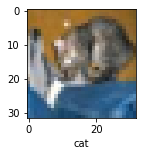

In [55]:
plot_sample(X_test, y_test,0)

In [57]:
classes[y_classes[0]]

'cat'

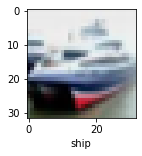

In [60]:
plot_sample(X_test, y_test,1)

In [61]:
classes[y_classes[1]]

'automobile'

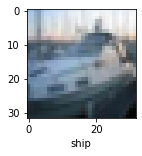

In [62]:
plot_sample(X_test, y_test,2)

In [63]:
classes[y_classes[2]]

'ship'

In [65]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      1000
           1       0.75      0.78      0.76      1000
           2       0.49      0.59      0.53      1000
           3       0.46      0.51      0.48      1000
           4       0.70      0.45      0.55      1000
           5       0.60      0.49      0.54      1000
           6       0.59      0.87      0.70      1000
           7       0.79      0.63      0.70      1000
           8       0.71      0.83      0.76      1000
           9       0.78      0.64      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.66      0.64      0.64     10000
weighted avg       0.66      0.64      0.64     10000



Text(69.0, 0.5, 'Truth')

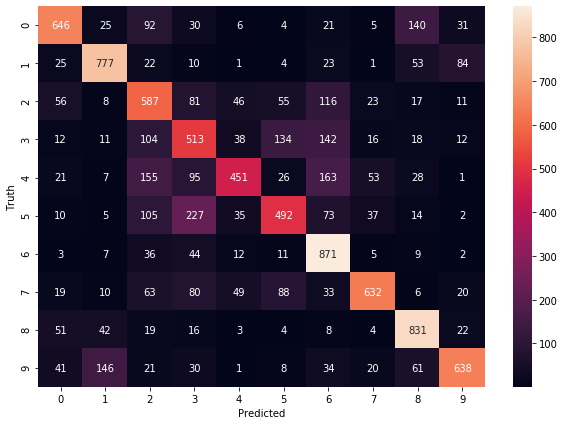

In [67]:
plt.figure(figsize=(10,7))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_classes),annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")